In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate, RepeatedKFold, learning_curve
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score, roc_auc_score

In [2]:
labels = pd.read_csv('improved_labels_corrected_by_HRD_status.csv', index_col=0)
features = pd.read_csv('./../../data_preprocessing/genetic_data_preprocessing/cleaned_Genomic_features_all_repositories.csv', index_col=0)

print(list(features))

['BRCA1/2_mut', 'other_HRR_gene_mutation_somatic', 'cnv_N_CNdipl', 'cnv_N_CNloss', 'cnv_N_CNgain', 'cnv_CNlt5_frac', 'cnv_CNgt10_frac', 'cnv_evenCN_frac', 'cnv_CNloss_frac', 'cnv_DUP_len_30000_inf', 'cnv_DUP_len_30_100', 'cnv_DEL_len_100000_inf', 'cnv_DIPLOID_len_100000_inf', 'sv_n_trans', 'sv_n_del', 'sv_n_inv', 'sv_n_tadem_dup', 'sv_trans_frac', 'sv_del_frac', 'sv_inv_frac', 'sv_tadem_dup_frac', 'sv_n_all_sv', 'sv_n_svclass_stdev', 'sv_dup_30000+', 'sv_del_100000+', 'sv_microhom_deletion_mean', 'sv_microhom_inversion_mean', 'sv_microhom_tandem-duplication_mean', 'sv_microhom_translocation_mean', 'indel_n_del', 'indel_n_ins', 'ins_indel_ratio', 'del_indel_ratio', 'indel_DEL_len_1', 'indel_DEL_len_2', 'indel_DEL_len_3', 'indel_DEL_len_4', 'indel_DEL_len_inf', 'indel_INS_len_1', 'indel_INS_len_2', 'indel_INS_len_3', 'indel_INS_len_4', 'indel_INS_len_inf', 'indel_DEL_mh', 'indel_DEL_noMHstatus', 'indel_DEL_rep', 'indel_del_mh_ratio', 'Telomeric_AI', 'Interstitial_AI', 'Telomeric_LOH', 'I

## Manual selection of biologically relevant features - frac

In [3]:
manually_selected_features_frac = features[['BRCA1/2_mut', 'other_HRR_gene_mutation_somatic','sv_trans_frac', 'sv_del_frac', 'sv_inv_frac', 'sv_tadem_dup_frac', 'sv_n_all_sv', 'sv_n_svclass_stdev','sv_microhom_deletion_mean', 'sv_microhom_inversion_mean', 'sv_microhom_tandem-duplication_mean', 'sv_microhom_translocation_mean', 'indel_n_del', 'indel_n_ins', 'ins_indel_ratio', 'del_indel_ratio', 'indel_DEL_len_1', 'indel_DEL_len_2', 'indel_DEL_len_3', 'indel_DEL_len_4', 'indel_DEL_len_inf', 'indel_INS_len_1', 'indel_INS_len_2', 'indel_INS_len_3', 'indel_INS_len_4', 'indel_INS_len_inf', 'indel_DEL_mh', 'indel_DEL_noMHstatus', 'indel_DEL_rep', 'indel_del_mh_ratio', 'Telomeric_AI', 'Interstitial_AI', 'Telomeric_LOH', 'Interstitial_LOH', 'LST_count', 'LOH_count', 'MSI', 'cnv_DEL_0_3500_sum_indel_DEL_len_inf', 'indel_INS_len_inf_sum_cnv_DUP_0_30000', 'indel_INS_len_inf_sum_cnv_DUP_0_1000', 'frac_cnv_DUP_len_30000_inf', 'frac_cnv_DEL_len_100000_inf', 'frac_cnv_DIPLOID_len_100000_inf', 'frac_sv_dup_30000+', 'frac_sv_del_frac', 'frac_sv_del_100000+', 'FBI_relaxed', 'percent_all_cc2ca', 'percent_all_cc2ct', 'cc2ca_vs_cc2ct', 'SBS31', 'ccne1_amp', 'resistant_ccne1_over_6', 'frac_cnv_DUP_len_0_30000', 'frac_cnv_DEL_len_0_100000', 'frac_cnv_DIPLOID_len_0_100000', 'frac_sv_dup_0_30000', 'frac_sv_del_0_100000']]    
print(list(manually_selected_features_frac))
manually_selected_features_frac.to_csv('manually_selected_features_frac.csv')

['BRCA1/2_mut', 'other_HRR_gene_mutation_somatic', 'sv_trans_frac', 'sv_del_frac', 'sv_inv_frac', 'sv_tadem_dup_frac', 'sv_n_all_sv', 'sv_n_svclass_stdev', 'sv_microhom_deletion_mean', 'sv_microhom_inversion_mean', 'sv_microhom_tandem-duplication_mean', 'sv_microhom_translocation_mean', 'indel_n_del', 'indel_n_ins', 'ins_indel_ratio', 'del_indel_ratio', 'indel_DEL_len_1', 'indel_DEL_len_2', 'indel_DEL_len_3', 'indel_DEL_len_4', 'indel_DEL_len_inf', 'indel_INS_len_1', 'indel_INS_len_2', 'indel_INS_len_3', 'indel_INS_len_4', 'indel_INS_len_inf', 'indel_DEL_mh', 'indel_DEL_noMHstatus', 'indel_DEL_rep', 'indel_del_mh_ratio', 'Telomeric_AI', 'Interstitial_AI', 'Telomeric_LOH', 'Interstitial_LOH', 'LST_count', 'LOH_count', 'MSI', 'cnv_DEL_0_3500_sum_indel_DEL_len_inf', 'indel_INS_len_inf_sum_cnv_DUP_0_30000', 'indel_INS_len_inf_sum_cnv_DUP_0_1000', 'frac_cnv_DUP_len_30000_inf', 'frac_cnv_DEL_len_100000_inf', 'frac_cnv_DIPLOID_len_100000_inf', 'frac_sv_dup_30000+', 'frac_sv_del_frac', 'frac_s

## Merge features and labels

In [4]:
table_v9 = pd.merge(manually_selected_features_frac, labels, on='SAMPLE_ID', how='inner')

table_v9 = table_v9.drop(columns=['Unnamed: 0'], errors='ignore')

table_v9 = table_v9.set_index('SAMPLE_ID', inplace=False)
table_v9.to_csv('merged_features_and_labels_v9.csv')

# Third model run - labels v2, manually selected features

### Train/test split

In [5]:
columns_to_drop = ['improved_label']

# features definition
X = table_v9.drop(columns_to_drop, axis=1)

# labels definition
y = table_v9['improved_label'] # labels

original_indices = X.index

In [6]:
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(X, y, original_indices, test_size=0.3, random_state=42)

### Features normalization

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X.shape)
print(y.shape)

(122, 58)
(122,)


### Model training

In [8]:
model = LogisticRegression()
model.fit(X_train, y_train)

evaluation_criteria = {
    'roc_auc': 'roc_auc',
    'precision': 'precision',
    'average_precision': 'average_precision',
    'recall': 'recall',
    'f1': 'f1',
    'balanced_accuracy': 'balanced_accuracy',
    'positive_likelihood_ratio': 'positive_likelihood_ratio'
}

scores = cross_validate(model, X, y, cv=5, scoring=evaluation_criteria)

for metric in evaluation_criteria:
    print(f"{metric}: {scores['test_' + metric]}")
    print(f"Mean {metric}: {scores['test_' + metric].mean()}")
    print(f"Std {metric}: {scores['test_' + metric].std()}\n")

roc_auc: [0.79824561 0.65789474 0.76842105 0.89473684 0.78947368]
Mean roc_auc: 0.7817543859649124
Std roc_auc: 0.07565127100422864

precision: [0.88235294 0.78947368 0.875      0.88888889 0.85714286]
Mean precision: 0.8585716742837486
Std precision: 0.03614179240950144

average_precision: [0.92360538 0.8795875  0.94358194 0.97391605 0.94268218]
Mean average_precision: 0.9326746101982692
Std average_precision: 0.031049861948981284

recall: [0.78947368 0.78947368 0.73684211 0.84210526 0.94736842]
Mean recall: 0.8210526315789475
Std recall: 0.07139294719079228

f1: [0.83333333 0.78947368 0.8        0.86486486 0.9       ]
Mean f1: 0.8375343764817449
Std f1: 0.04095172289362486

balanced_accuracy: [0.72807018 0.56140351 0.66842105 0.72105263 0.67368421]
Mean balanced_accuracy: 0.6705263157894736
Std balanced_accuracy: 0.05964293053513829

positive_likelihood_ratio: [2.36842105 1.18421053 1.84210526 2.10526316 1.57894737]
Mean positive_likelihood_ratio: 1.8157894736842106
Std positive_likel

/home/klaudiautm/PycharmProjects/final_project/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/klaudiautm/PycharmProjects/final_project/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sci

### Model testing

In [9]:
y_pred = model.predict(X_test)

y_pred_list = pd.DataFrame(y_pred, columns=['Predicted'], index=idx_test)

### Model evaluation

In [10]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"AUC: {roc_auc}")
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(cr)

Accuracy: 0.8108108108108109
AUC: 0.6182795698924731
Confusion Matrix:
[[ 2  4]
 [ 3 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.33      0.36         6
           1       0.88      0.90      0.89        31

    accuracy                           0.81        37
   macro avg       0.64      0.62      0.63        37
weighted avg       0.80      0.81      0.80        37



<Axes: >

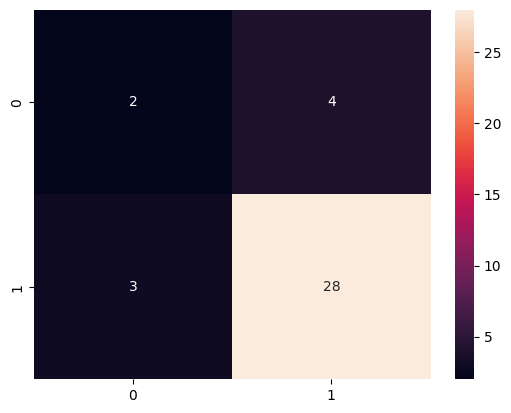

In [11]:
import seaborn as sns
sns.heatmap(cm, annot=True)

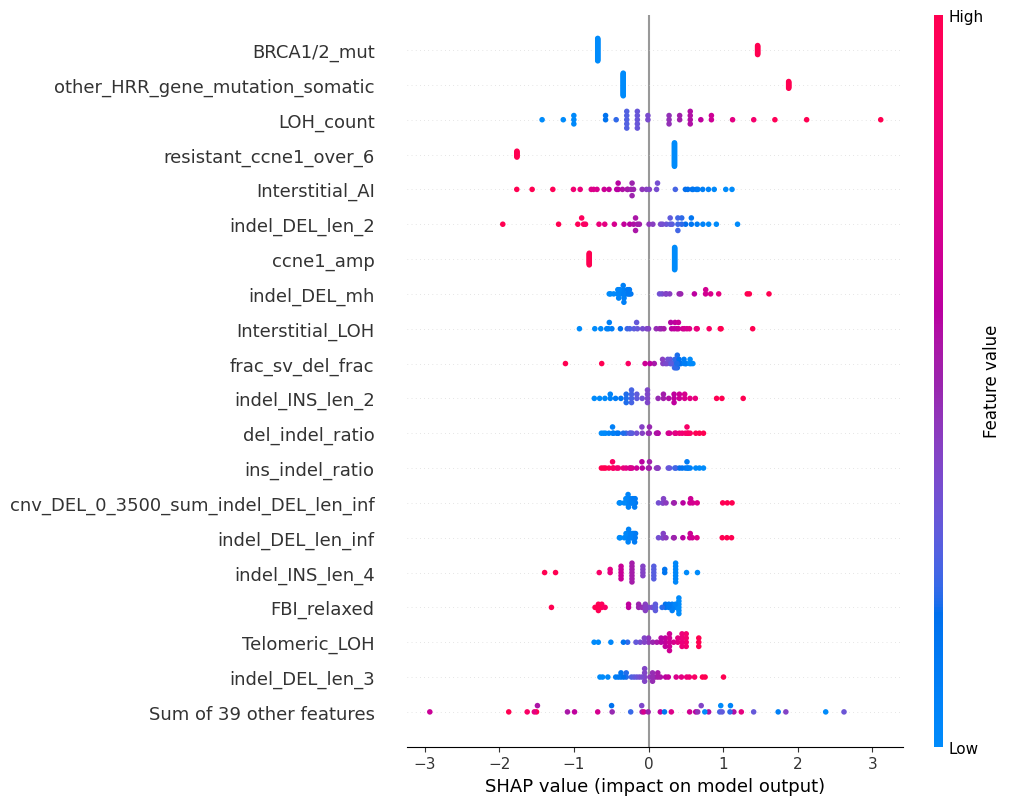

In [12]:
import shap

original_feature_names = ['BRCA1/2_mut', 'other_HRR_gene_mutation_somatic', 'sv_trans_frac', 'sv_del_frac', 'sv_inv_frac', 'sv_tadem_dup_frac', 'sv_n_all_sv', 'sv_n_svclass_stdev', 'sv_microhom_deletion_mean', 'sv_microhom_inversion_mean', 'sv_microhom_tandem-duplication_mean', 'sv_microhom_translocation_mean', 'indel_n_del', 'indel_n_ins', 'ins_indel_ratio', 'del_indel_ratio', 'indel_DEL_len_1', 'indel_DEL_len_2', 'indel_DEL_len_3', 'indel_DEL_len_4', 'indel_DEL_len_inf', 'indel_INS_len_1', 'indel_INS_len_2', 'indel_INS_len_3', 'indel_INS_len_4', 'indel_INS_len_inf', 'indel_DEL_mh', 'indel_DEL_noMHstatus', 'indel_DEL_rep', 'indel_del_mh_ratio', 'Telomeric_AI', 'Interstitial_AI', 'Telomeric_LOH', 'Interstitial_LOH', 'LST_count', 'LOH_count', 'MSI', 'cnv_DEL_0_3500_sum_indel_DEL_len_inf', 'indel_INS_len_inf_sum_cnv_DUP_0_30000', 'indel_INS_len_inf_sum_cnv_DUP_0_1000', 'frac_cnv_DUP_len_30000_inf', 'frac_cnv_DEL_len_100000_inf', 'frac_cnv_DIPLOID_len_100000_inf', 'frac_sv_dup_30000+', 'frac_sv_del_frac', 'frac_sv_del_100000+', 'FBI_relaxed', 'percent_all_cc2ca', 'percent_all_cc2ct', 'cc2ca_vs_cc2ct', 'SBS31', 'ccne1_amp', 'resistant_ccne1_over_6', 'frac_cnv_DUP_len_0_30000', 'frac_cnv_DEL_len_0_100000', 'frac_cnv_DIPLOID_len_0_100000', 'frac_sv_dup_0_30000', 'frac_sv_del_0_100000']
X_train_features = pd.DataFrame(X_train, columns=original_feature_names)
X_test_features = pd.DataFrame(X_test, columns=original_feature_names)

explainer = shap.Explainer(model, X_train_features)
shap_values = explainer(X_test_features)
shap.plots.beeswarm(shap_values, max_display=20)

In [13]:
predicted_vs_original_labels = pd.merge(labels, y_pred_list, on='SAMPLE_ID', how='inner')
predicted_vs_original_labels.to_csv('predicted_vs_original_labels_model_v9.csv')